# Optional Lab - Multi-class Classification


## 1.1 Goals
在这个实验中，你将探索使用神经网络进行多类分类的一个例子。神经网络是一种强大的工具，可以处理各种复杂的分类问题。我期待你在这个实验中能有所收获！
<figure>
 <img src="./images/C2_W2_mclass_header.png"   style="width500px;height:200px;">
</figure>


## 1.2 工具
你将使用一些绘图程序。这些程序存储在此目录中的`lab_utils_multiclass_TF.py`文件中。这些工具将帮助你更好地理解和可视化多类分类问题。祝你在实验中学有所得！

In [31]:
#https://mckayward.github.io/floyd-docs/guides/environments/
# https://www.cnblogs.com/-yhwu/p/14619541.html
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# 2.0 多类分类
神经网络经常被用来对数据进行分类。例如，神经网络可以：
- 输入照片，将照片中的主题分类为{狗，猫，马，其他}
- 输入一个句子，将其元素的"词性"分类为{名词，动词，形容词等}  

这种类型的网络在其最后一层会有多个单元。每个输出都与一个类别相关联。当一个输入样本应用到网络时，值最高的输出是预测的类别。如果输出应用到softmax函数，softmax的输出将提供输入在每个类别中的概率。

在这个实验中，你将看到一个在Tensorflow中构建多类网络的例子。然后，我们将看一下神经网络是如何做出预测的。

让我们开始创建一个四类数据集。祝你在实验中学有所得！

## 2.1 准备和可视化我们的数据
我们将使用Scikit-Learn的`make_blobs`函数来创建一个有4个类别的训练数据集，如下图所示。这个函数可以帮助我们生成一些可以用于分类的数据点，这些数据点可以被我们的神经网络模型用来学习和预测。祝你在实验中学有所得！

In [32]:
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

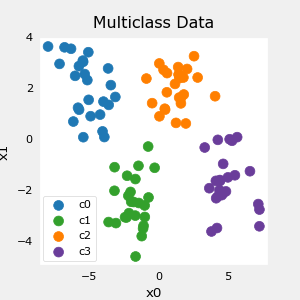

In [33]:
plt_mc(X_train,y_train,classes, centers, std=std)

每个点代表一个训练样本。轴（x0,x1）是输入，颜色代表样本关联的类别。一旦训练完成，模型将会接收一个新的样本（x0,x1），并预测其类别。

虽然这个数据集是生成的，但它代表了许多现实世界中的分类问题。有几个输入特征（x0,...,xn）和几个输出类别。模型被训练用来使用输入特征来预测正确的输出类别。这是一个典型的多类分类问题，神经网络在这方面的应用非常广泛。祝你在实验中学有所得！

In [34]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


## 2.2 模型
<img align="Right" src="./images/C2_W2_mclass_lab_network.PNG"  style=" width:350px; padding: 10px 20px ; ">
这个实验将使用如图所示的两层网络。
与二元分类网络不同，这个网络有四个输出，每个类别一个。给定一个输入样本，值最高的输出是输入的预测类别。

下面是一个如何在Tensorflow中构建这个网络的例子。注意，输出层使用的是`线性`而不是`softmax`激活。虽然可以在输出层中包含softmax，但在训练过程中，如果将线性输出传递给损失函数，会更稳定。如果模型被用来预测概率，那么可以在那个时候应用softmax。祝你在实验中学有所得！

In [35]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

以下的语句将编译和训练网络。在损失函数中设置`from_logits=True`参数指定输出激活是线性的，而不是softmax。这是因为在训练过程中，如果将线性输出传递给损失函数，会更稳定。如果模型被用来预测概率，那么可以在那个时候应用softmax。祝你在实验中学有所得！

In [36]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01),
)

model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 2.1805
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 1.9812
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1.8048
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 1.6562
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 1.5346
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 1.4138
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 1.3251
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 1.2437
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1785
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 1.1137
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0669
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0259
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

模型训练完毕后，我们可以看到模型是如何对训练数据进行分类的。

184/184 [==============================] - 0s 916us/step


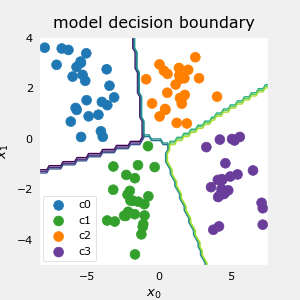

In [37]:
plt_cat_mc(X_train, y_train, model, classes)

以上，决策边界显示了模型如何划分输入空间。这个非常简单的模型在分类训练数据时没有遇到任何困难。它是如何做到这一点的呢？让我们更详细地看看网络。

下面，我们将从模型中提取训练好的权重，并使用它来绘制每个网络单元的函数。更下面，有对结果的更详细的解释。你不需要知道这些细节就可以成功地使用神经网络，但是，这可能有助于你更直观地理解层是如何组合起来解决分类问题的。祝你在实验中学有所得！

In [38]:
# gather the trained parameters from the first layer
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

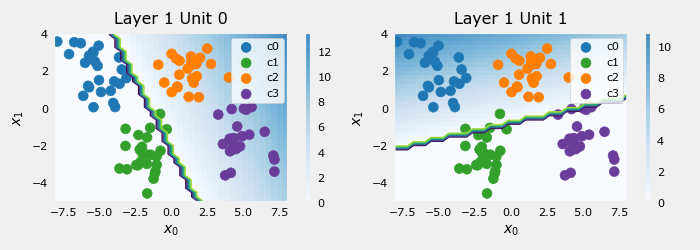

In [39]:
# plot the function of the first layer
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

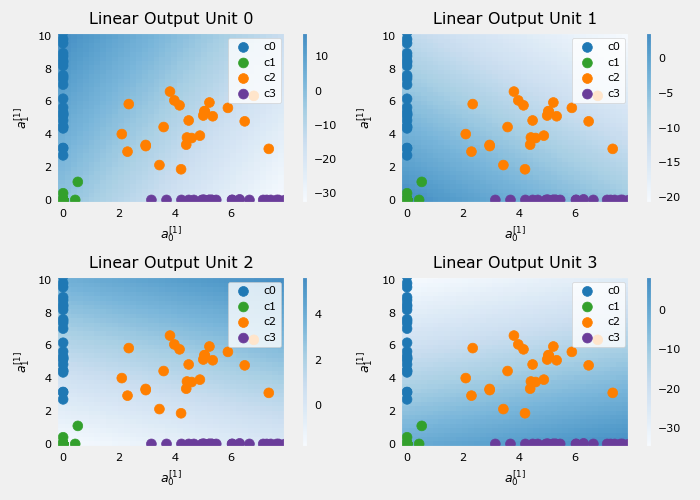

In [40]:
# gather the trained parameters from the output layer
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.zeros_like(X_train)
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

## 解释
#### 第一层 <img align="Right" src="./images/C2_W2_mclass_layer1.png"  style=" width:600px; padding: 10px 20px ; ">

这些图表显示了网络第一层中单元0和1的功能。输入是轴上的($x_0,x_1$)。单元的输出由背景的颜色表示。这由每个图表右侧的颜色条指示。注意，由于这些单元使用的是ReLu，输出并不一定落在0和1之间，在它们的峰值处，这个值大于20。 

这个图表中的等高线显示了输出$a^{[1]}_j$从零到非零的转变点。回想一下ReLu的图表：<img align="right" src="./images/C2_W2_mclass_relu.png"  style=" width:200px; padding: 10px 20px ; ">图表中的等高线是ReLu的拐点。

单元0将类别0和1与类别2和3分开。线的左边的点（类别0和1）将输出零，而右边的点将输出大于零的值。  
单元1将类别0和2与类别1和3分开。线以上的点（类别0和2）将输出零，而线以下的点将输出大于零的值。让我们看看在下一层这是如何工作的！

#### 第二层，输出层 <img align="Right" src="./images/C2_W2_mclass_layer2.png"  style=" width:600px; padding: 10px 20px ; ">

这些图表中的点是经过第一层转换的训练样本。可以将其理解为第一层为第二层评估创建了一组新的特征。这些图表的轴是前一层的输出$a^{[1]}_0$和$a^{[1]}_1$。如上所述，类别0和1（绿色和蓝色）的$a^{[1]}_0 = 0$，而类别1和2（蓝色和绿色）的$a^{[1]}_1 = 0$。

再次，背景颜色的强度表示最高值。

单元0将对接近（0,0）的值产生最大值，这是类别0（蓝色）的映射位置。

单元1在左上角产生最高值，选择类别1（绿色）。

单元2针对右下角，那里是类别3（橙色）的位置。

单元3在右上角产生最高值，选择我们的最后一个类别（紫色）。

图表中不明显的另一个方面是，各个单元之间的值已经进行了协调。对于选择的类别，单元产生最大值是不够的，它必须是该类别中所有点的所有单元的最高值。这是通过损失函数（`SparseCategoricalCrossEntropy`）中的隐含的softmax函数完成的。与其他激活函数不同，softmax在所有输出上都起作用。

你可以在不了解每个单元的详细情况下成功地使用神经网络。希望这个例子能提供一些关于底层发生了什么的直观理解。

恭喜你！你已经学会了如何构建和操作一个用于多类别分类的神经网络。
